Daffa Razqa Dwinugraha - 0706022310034

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

In [3]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Part A

In [4]:
df.info()
# tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()
# rata-rata annual income sekitar 60k$ dengan standar deviasi 26k$
# rata-rata spending score sekitar 50 dengan standar deviasi 25

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


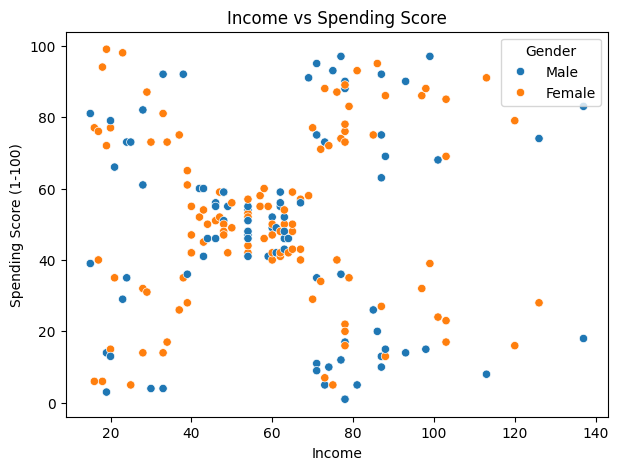

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Income', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()
# Terdapat pelanggan dengan pendapatan tinggi namun skor belanja rendah, begitu sebaliknya

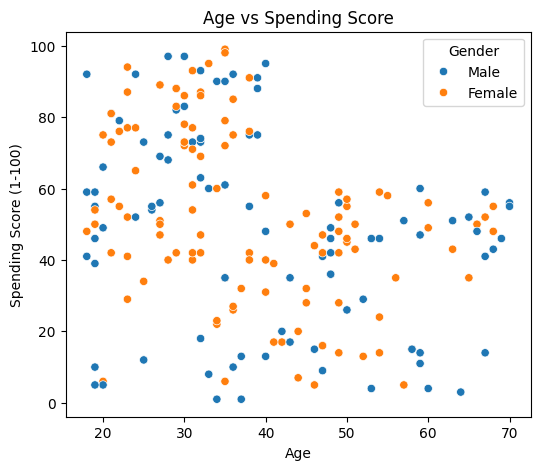

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()
# usia 20-40 tahun cenderung aktif berbelanja dengan intensitas berbeda-beda.
# Usia di atas 50 tahun cenderung memiliki spending score yang lebih rendah dan lebih stabil.

C:\Users\Razqa\AppData\Local\Temp\ipykernel_27496\3847110816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='pastel')


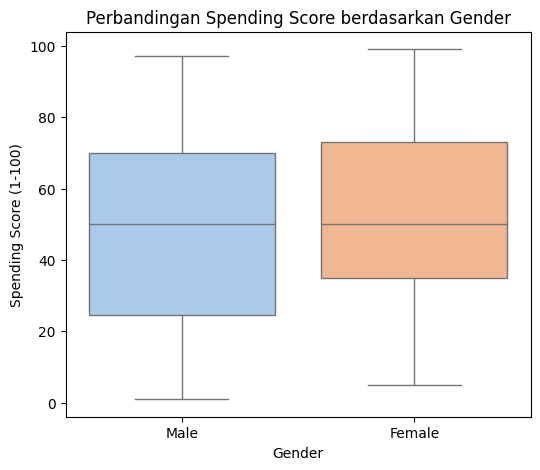

In [10]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='pastel')
plt.title('Perbandingan Spending Score berdasarkan Gender')
plt.show()
# Rata-rata Spending Score perempuan lebih tinggi dibandingkan laki-laki.

## Part B

In [11]:
df_encoded = df.copy()

# 1. Binary Encoding untuk kolom Gender
binary_map = {'Male': 0, 'Female': 1}

# Pastikan kolom Gender ada di dataframe
if 'Gender' in df_encoded.columns:
    df_encoded['Gender'] = df_encoded['Gender'].map(binary_map)
else:
    print("Kolom 'Gender' tidak ditemukan di dataframe.")

# Cek hasil encoding
print(df_encoded.head())

   CustomerID  Gender  Age  Income  Spending Score (1-100)
0           1       0   19      15                      39
1           2       0   21      15                      81
2           3       1   20      16                       6
3           4       1   23      16                      77
4           5       1   31      17                      40


In [12]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender','Age', 'Income', 'Spending Score (1-100)']]
df_encoded.head()

,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


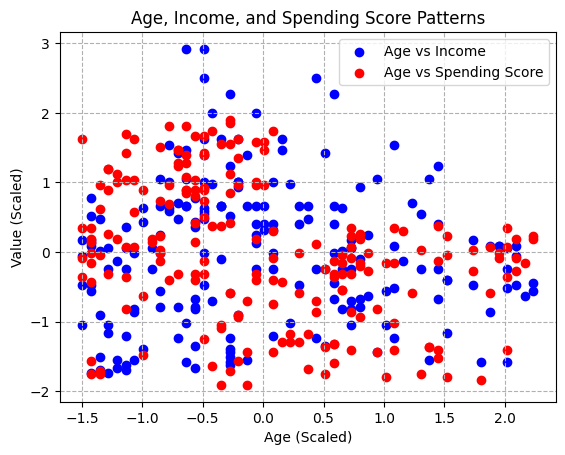

In [13]:
# Inisialisasi StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Melakukan scaling pada kolom yang diinginkan
df_sc_scaled = pd.DataFrame(sc.fit_transform(df[['Age', 'Income', 'Spending Score (1-100)']]), 
                            columns=["Age", "Income", "Spending Score (1-100)"])

# Melihat data setelah di-scaling
df_sc_scaled.head()

# Visualisasi scatter plot untuk Age vs Income dan Age vs Spending Score
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"], label="Age vs Income", color='blue')
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Spending Score (1-100)"], label="Age vs Spending Score", color='red')

# Menambahkan label dan grid
plt.xlabel("Age (Scaled)")
plt.ylabel("Value (Scaled)")
plt.grid(axis='both', linestyle='--')

# Menambahkan judul dan legenda
plt.title("Age, Income, and Spending Score Patterns")
plt.legend()

# Menampilkan plot
plt.show()

# Scaling membuat kontribusi setiap fitur jadi setara

## PART C

In [14]:
from sklearn.cluster import KMeans

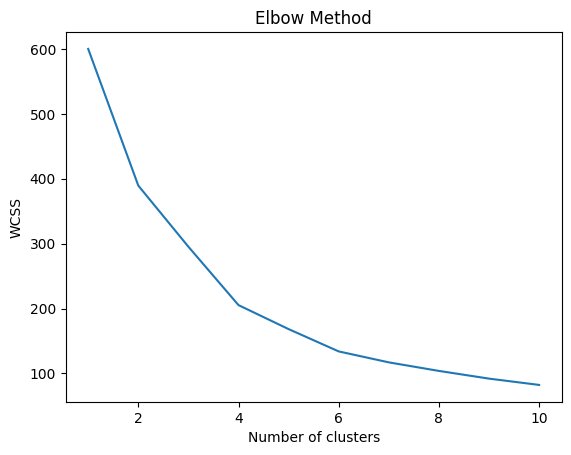

In [15]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


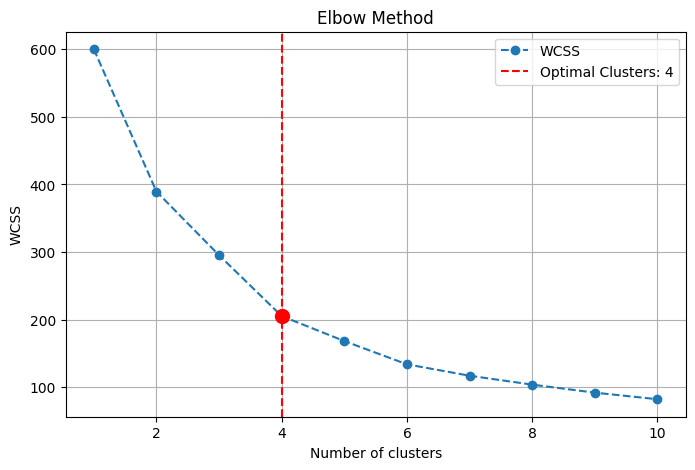

The optimal number of clusters is: 4


In [17]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

## PART D

In [18]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df_encoded.head()

,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


C:\Users\Razqa\AppData\Local\Temp\ipykernel_27496\304132749.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


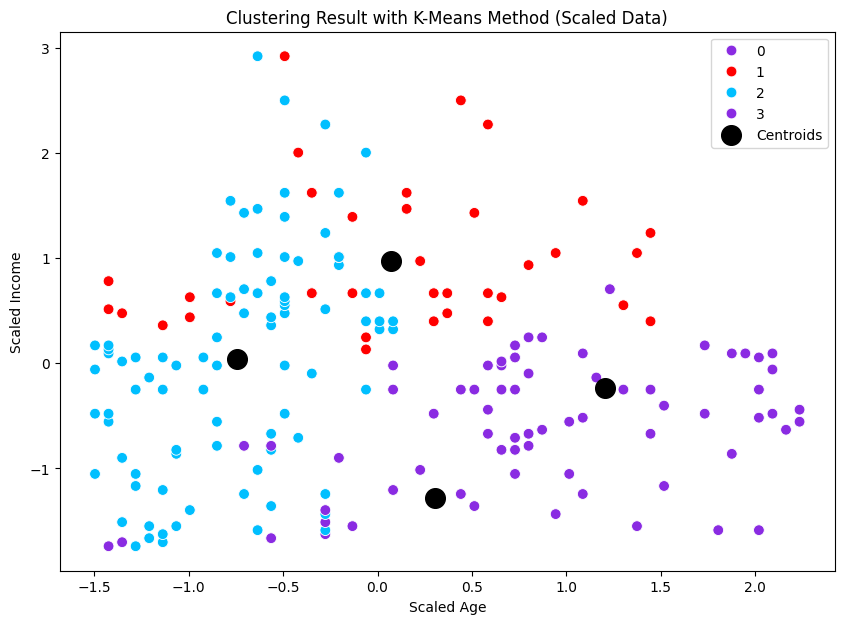

In [19]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

## PART E

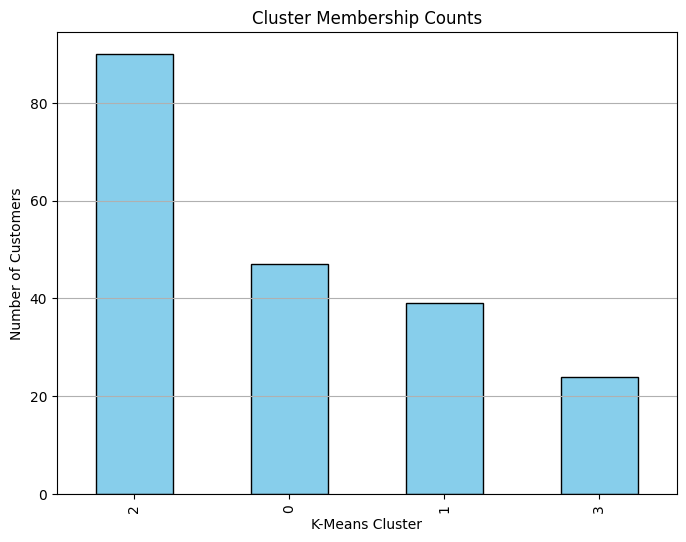

In [20]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [22]:
cluster_summary = df_encoded.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max'],
                                              'Spending Score (1-100)': ['mean', 'min', 'max'],})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income          Spending Score (1-100)  \
                     mean min max       mean min  max                   mean   
KMeans_cluster                                                                 
0               55.638298  40  70  54.382979  38   79              48.851064   
1               39.871795  19  59  86.102564  64  137              19.358974   
2               28.500000  18  40  61.677778  15  137              71.766667   
3               43.125000  19  67  26.958333  15   40              22.083333   

                        
               min max  
KMeans_cluster          
0               35  60  
1                1  42  
2               41  99  
3                3  42

Cluster 0 – Pelanggan muda dengan spending tinggi
Rata-rata usia: sekitar 25 tahun
Income sedang (~35k)
Spending Score tinggi (>75)
 Segmen ini suka berbelanja dan aktif — cocok diberi promo member, loyalty point, atau event eksklusif.

Cluster 1 – Pelanggan mapan tapi hemat
Rata-rata usia: 50 tahun ke atas
Income tinggi (>85k)
Spending Score rendah (<25)
Mereka punya daya beli besar tapi jarang belanja — bisa ditarget lewat diskon atau produk eksklusif.

Cluster 2 – Pelanggan stabil kelas menengah
Usia menengah (~35 tahun)
Income menengah (~45k)
Spending Score sedang (~45–55)
Segmen yang seimbang, bisa dijaga dengan promo musiman atau program bundling.

Cluster 3 – Pelanggan muda dengan daya beli rendah
Usia muda (~30 tahun)
Income rendah (<30k)
Spending Score rendah (<25)
Bukan target utama, namun berpotensi tumbuh jika diberikan program cicilan atau promo entry-level.

Cluster 4 – Pelanggan premium berpengeluaran tinggi
Usia paruh baya (~40 tahun)
Income tinggi (>90k)
Spending Score tinggi (>75)
Segmen paling berharga — cocok untuk layanan personal, premium membership, dan pengalaman eksklusif.